## Human Freedom Index
from Kaggle: https://www.kaggle.com/gsutters/the-human-freedom-index

The human freedom index is a broad measure of overall freedom in countries around the world. This is based on measures of personal, civil and economic freedoms. More information (https://www.cato.org/human-freedom-index-new)

In [74]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("hfi_cc_2018.csv")

In [33]:
df.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


# What does the regional human freedom scores look like?

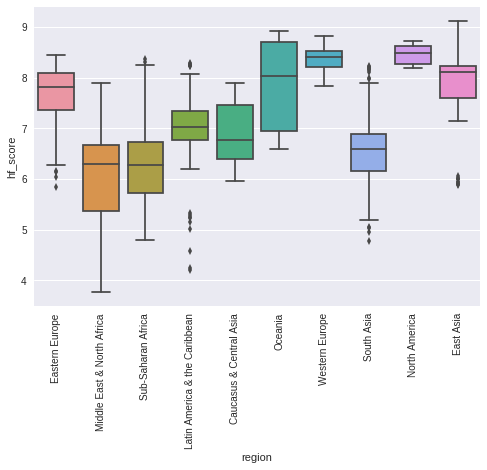

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

In [34]:
reghf = sns.boxplot(x='region', y = 'hf_score', data=df)
sns.plt.show()
plt.xticks(rotation=90)

Quite the  range in human freedom index. Oceania region has a comparatively large IQR: I wonder why?

# Let's look at Oceania region more closely

In [10]:
oceania_df = df.loc[df['region']=='Oceania',]
oceania_df.reset_index(drop=True,inplace=True)

In [40]:
oceania_df.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,AUS,Australia,Oceania,8.439110,7.525648,7.364078,7.776279,9.623538,10.0,...,7.238900,8.944387,8.823021,8.121631,8.465526,7.98,10.0,8.582219,4.0,1.0
1,2016,FJI,Fiji,Oceania,NaN,NaN,NaN,4.701806,9.096868,10.0,...,NaN,8.618647,7.231296,7.820161,8.837899,6.79,88.0,7.291102,55.0,2.0
2,2016,NZL,New Zealand,Oceania,8.365538,7.877339,7.362762,7.868546,9.605842,10.0,...,8.604417,9.398649,8.430694,8.651581,9.159782,8.49,3.0,8.887410,1.0,1.0
3,2016,PNG,Pap. New Guinea,Oceania,NaN,NaN,NaN,3.970458,6.861761,10.0,...,3.201706,7.377687,7.769344,5.744827,7.270131,6.25,122.0,6.752474,88.0,3.0
4,2015,AUS,Australia,Oceania,8.495798,7.667774,7.518147,7.893906,9.603354,10.0,...,6.965338,9.091938,8.823021,8.128533,8.456478,8.00,8.0,8.607373,5.0,1.0


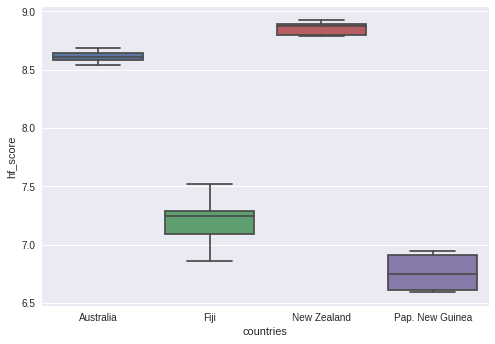

In [56]:
oceania = sns.boxplot(x='countries', y = 'hf_score', data=oceania_df)
sns.plt.show()
#plt.xticks(rotation=90)
#NtS: get rid of 2015 data

New Zealand and Australia have a high human freedom score while Fiji and Papa New Guinea are much lower. 

# Political freedoms in Oceania region

In [11]:
oceania_df.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,36.000000,18.000000,18.000000,18.000000,36.000000,36.000000,36.0,36.0,27.000000,36.000000,...,22.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2012.000000,8.576215,7.499192,7.490772,6.027181,8.766036,10.0,10.0,9.259259,9.997648,...,7.387589,8.494259,8.188760,7.706976,8.454086,7.484722,45.250000,7.858762,39.444444,1.750000
std,2.618615,0.208241,0.214937,0.288735,1.874823,1.138986,0.0,0.0,1.163304,0.010420,...,2.173722,0.899233,0.501328,0.840419,0.566081,0.779093,43.353283,0.915284,38.455499,0.840918
min,2008.000000,8.123283,7.232831,7.200000,3.795297,6.861761,10.0,10.0,7.500000,9.943272,...,3.063083,7.139647,7.231296,5.722323,7.047269,6.170000,3.000000,6.592903,1.000000,1.000000
25%,2010.000000,8.496848,7.300000,7.236429,4.234174,8.194274,10.0,10.0,7.500000,10.000000,...,7.033729,7.376827,7.814181,7.202463,8.202469,6.830000,4.500000,6.941241,3.500000,1.000000
50%,2012.000000,8.555624,7.512824,7.363420,6.191379,9.286906,10.0,10.0,10.000000,10.000000,...,8.000675,8.619009,8.172880,7.917355,8.508270,7.590000,27.500000,8.033486,28.000000,1.500000
75%,2014.000000,8.733333,7.599611,7.708131,7.805859,9.587627,10.0,10.0,10.000000,10.000000,...,9.019163,9.152774,8.778183,8.186562,8.871905,8.127500,79.000000,8.710675,77.000000,2.250000
max,2016.000000,8.800000,7.877339,7.937974,8.100000,9.646928,10.0,10.0,10.000000,10.000000,...,9.623811,9.813665,9.215347,8.709728,9.159782,8.490000,122.000000,8.921386,107.000000,3.000000


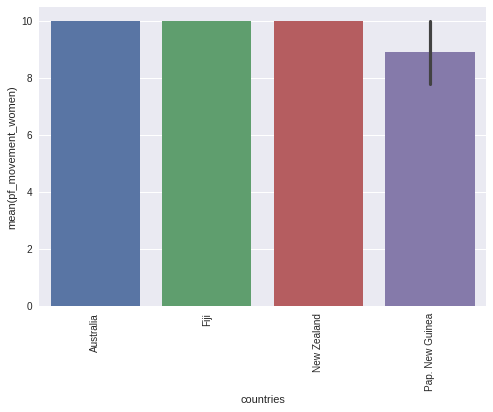

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

In [20]:
plot = sns.barplot(x='countries', y = 'pf_movement_women', data= oceania_df)
sns.plt.show()
plt.xticks(rotation=90)

# Let's look at the Midde-East and North Africa next

In [35]:
midEastNAf_df = df.loc[df['region']=='Middle East & North Africa',]
midEastNAf_df.reset_index(drop=True,inplace=True)

In [53]:
midEastNAf_df.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
1,2016,BHR,Bahrain,Middle East & North Africa,NaN,NaN,NaN,5.900339,9.790481,10.0,...,6.596745,8.074670,9.680534,8.018774,7.415786,7.56,30.0,6.848035,75.0,2.0
2,2016,EGY,Egypt,Middle East & North Africa,2.948325,3.763257,4.166860,3.626148,8.994685,0.0,...,4.757293,8.110556,5.605944,5.603716,4.818902,5.72,147.0,4.807277,156.0,4.0
3,2016,IRN,Iran,Middle East & North Africa,3.410152,5.211233,4.505767,4.375717,9.012385,0.0,...,4.294963,9.301307,6.143992,5.763464,5.670161,6.03,130.0,5.281225,153.0,4.0
4,2016,IRQ,Iraq,Middle East & North Africa,NaN,NaN,NaN,2.464387,6.058217,0.0,...,NaN,8.195023,6.502690,5.833445,6.475280,5.40,152.0,4.258014,159.0,4.0


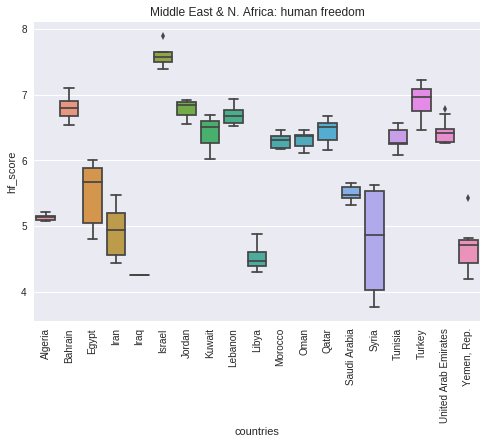

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

In [50]:
plot = sns.boxplot(x='countries', y = 'hf_score', data= midEastNAf_df).set_title("Middle East & N. Africa: human freedom")
sns.plt.show()
plt.xticks(rotation=90)

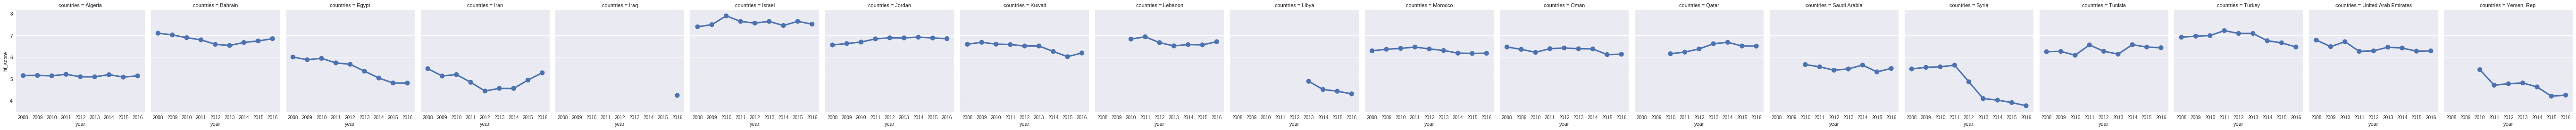

In [37]:
sns.factorplot(data=midEastNAf_df, x="year", y="hf_score", col='countries')
sns.plt.show()

## Israel

- Israel has a much higher human freedom index compared to the rest of the region. Let's examine this. 

In [45]:
israel_df = df.loc[df['countries']=='Israel',]
israel_df.reset_index(drop=True,inplace=True)

In [59]:
israel_df.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ISR,Israel,Middle East & North Africa,NaN,NaN,NaN,6.790678,9.454402,10.0,...,6.121127,7.507838,7.365808,7.235173,7.411095,7.49,38.0,7.517458,49.0,2.0
1,2015,ISR,Israel,Middle East & North Africa,NaN,NaN,NaN,7.110584,9.454402,10.0,...,5.815420,7.507657,7.365808,7.198992,7.384474,7.47,38.0,7.646339,46.0,2.0
2,2014,ISR,Israel,Middle East & North Africa,NaN,NaN,NaN,6.823119,9.405641,10.0,...,5.045550,7.507476,7.365808,6.908423,7.410303,7.45,42.0,7.455517,51.0,2.0
3,2013,ISR,Israel,Middle East & North Africa,NaN,NaN,NaN,6.590184,9.405641,10.0,...,6.374344,7.507476,7.365808,7.054799,7.321355,7.42,37.0,7.642391,45.0,2.0
4,2012,ISR,Israel,Middle East & North Africa,NaN,NaN,NaN,6.590184,9.303815,10.0,...,6.822780,7.337872,7.365808,7.142559,7.174538,7.36,40.0,7.565425,49.0,2.0


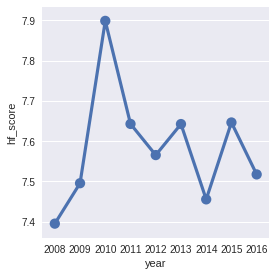

In [46]:
sns.factorplot(data=israel_df, x="year", y="hf_score")
sns.plt.show()

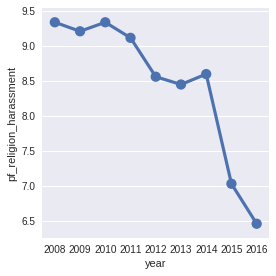

In [47]:
sns.factorplot(data=israel_df, x="year", y="pf_religion_harassment")
sns.plt.show()

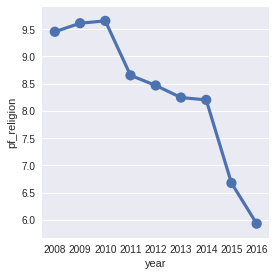

In [48]:
sns.factorplot(data=israel_df, x="year", y="pf_religion")
sns.plt.show()

# Syria

- Let's look why Syria's IQR is so broad

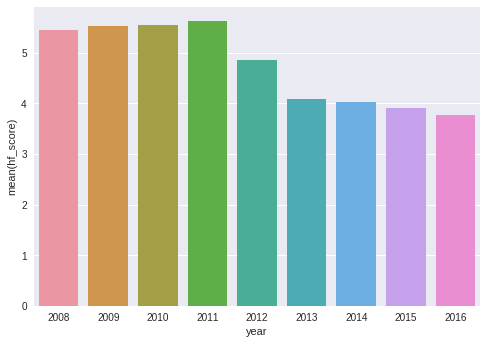

In [30]:
syria_df = df.loc[df['countries']=='Syria',]
syria_df.reset_index(drop=True,inplace=True)
plot = sns.barplot(x='year', y = 'hf_score', data= syria_df)
sns.plt.show()
#Nts: fix color palette to purple 

- Syria's human freedom index decreases in 2012 and then continues declining every year after that
- The decrease in human freedom index post-2011 corresponds with the civil war: protests that broke out in 2011 which gave way to fighting and the rise of terrorist/extremist groups


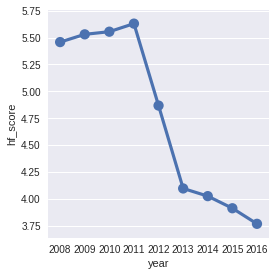

In [42]:
sns.factorplot(data=syria_df, x="year", y="hf_score")
sns.plt.show()

# North America region

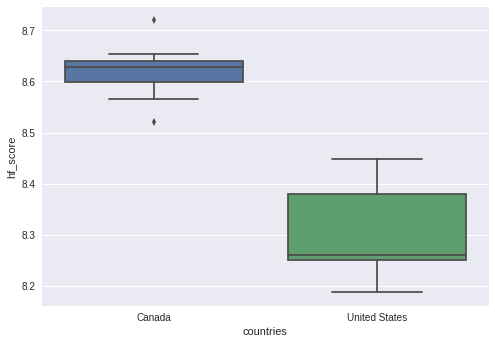

In [28]:
Namerica_df = df.loc[df['region']=='North America',]
Namerica_df.reset_index(drop=True,inplace=True)
plot = sns.boxplot(x='countries', y = 'hf_score', data= Namerica_df)
sns.plt.show()

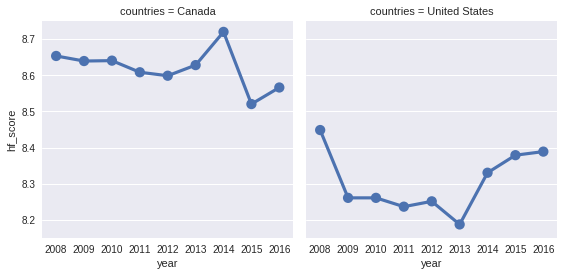

In [33]:
sns.factorplot(data=Namerica_df, x="year", y="hf_score", col='countries')
sns.plt.show()